In [36]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import nltk
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# language detection
import langid


In [37]:
df = pd.read_csv('./data_.csv', encoding='latin-1')
df.head()

,score,id,timestamp,dummy,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [38]:
df.shape

(1048575, 6)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   score      1048575 non-null  int64 
 1   id         1048575 non-null  int64 
 2   timestamp  1048575 non-null  object
 3   dummy      1048575 non-null  object
 4   username   1048575 non-null  object
 5   tweet      1048349 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [40]:
df.describe

<bound method NDFrame.describe of          score          id                     timestamp     dummy  \
0            0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1            0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2            0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3            0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4            0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
1048570      4  1960186091  Fri May 29 07:33:42 PDT 2009  NO_QUERY   
1048571      4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048572      4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
1048573      4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048574      4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   

                username                                              tweet  
0        _TheSpecialOne_  @switchfoot http://tw

In [41]:
np.sum(df.isnull().any(axis=1))

226

In [42]:
print("Shape of data", " : ",df.shape)
print("Unique items in Induvidual Features")
print("Score : ",pd.unique(df['score']))
# print("Category : ",pd.unique(df['category']))

Shape of data  :  (1048575, 6)
Unique items in Induvidual Features
Score :  [0 4]


In [43]:
tweets = df['tweet'].copy()
tweets[1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [44]:
# import re

# text = "This# \'is a test string with \"quotes\"."

# # Substitute all characters except " ' " with a blank space
# substituted_text = re.sub(r"[^ \"'\"\w]+|\s+", " ", text)

# print(substituted_text)


import re
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
# print(tweets[40])
for i in range(len(tweets)):
    tweets[i] = (re.sub("(@[A-Za-z0–9_]+)|[^ \"'\"\w]+|\s| +|[0-9]|#|http\S+"," ",str(tweets[i])).strip()).lower()
    
# print(test) 
#r"[^ "'"]+|\s+"
df['clean_tweets'] = tweets
tweets[0]
print(tweets[1])

is upset that he can't update his facebook by texting it  and might cry as a result  school today also  blah


In [45]:
l_ = []
# nltk.download('stopwords')
# handling stopwords
s = stopwords.words('english')
# some keywords will have certain significance and we have to inculde them in data
# l_ = ['no','not','ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
sw = [] 
for word in s:
    if word not in l_:
        sw.append(word)
sw.extend(["i'm","i'd","im","that's","got","shoulda","gotta"])
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in sw])
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['clean_tweets'] = df['clean_tweets'].apply(lambda text: cleaning_stopwords(text))
df['clean_tweets'] = df['clean_tweets'].apply(lambda text: cleaning_repeating_char(text))

In [47]:
df['clean_tweets']

0                           awww bummer david carr third day
1          upset can't update facebook texting might cry ...
2          dived many times ball managed save rest go bounds
3                           whole body feels itchy like fire
4                                     behaving mad can't see
                                 ...                        
1048570    back home thought done week call alter somethi...
1048571                            grandma making dinenr mum
1048572       mid morning snack time bowl cheese noodles yum
1048573         say like terminiator movies comes like words
1048574                                   great thaanks wbuu
Name: clean_tweets, Length: 1048575, dtype: object

In [48]:
df['clean_tweets'][1]

"upset can't update facebook texting might cry result school today also blah"

In [49]:

# Load the NLTK English tokenizer
tokenizer = nltk.tokenize.TweetTokenizer()

# Split the data into chunks
chunks = []
f = df['clean_tweets'].copy()
c =1000
for line in f:
#     print(line)
    chunks.append(line)
    c-=1
    if c==0:
        break



# Tokenize each chunk
tokenized_data = []
for chunk in chunks:
    # print(chunk)
    tokens = tokenizer.tokenize(" ".join(chunk.split()))
    tokenized_data.extend(tokens)



In [53]:
# print(chunks[:1000])
# print(tokenized_data[:10000])

['awww', 'bummer', 'david', 'carr', 'third', 'day', 'upset', "can't", 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah', 'dived', 'many', 'times', 'ball', 'managed', 'save', 'rest', 'go', 'bounds', 'whole', 'body', 'feels', 'itchy', 'like', 'fire', 'behaving', 'mad', "can't", 'see', 'whole', 'crew', 'need', 'hug', 'hey', 'long', 'time', 'see', 'yes', 'rains', 'bit', 'bit', 'lol', 'fine', 'thanks', "how's", 'nope', 'que', 'muera', 'spring', 'break', 'plain', 'city', 'snowing', 'pierced', 'ears', 'bear', 'watch', 'thought', 'ua', 'loss', 'embarrassing', 'counts', 'idk', 'either', 'never', 'talk', 'anymore', "would've", 'first', 'gun', 'really', 'though', 'zac', "snyder's", 'doucheclown', 'wish', 'watch', 'miss', 'premiere', 'hollis', "'", 'death', 'scene', 'hurt', 'severely', 'watch', 'film', 'wry', 'directors', 'cut', 'file', 'taxes', 'ahh', 'ive', 'always', 'wanted', 'see', 'rent', 'love', 'soundtrack', 'oh', 'dear', 'drinking', 'forgotten', '

In [ ]:
final = ""
for token in tokenized_data :
    # print(token)
    final += token + " "
# print(final[:1000])

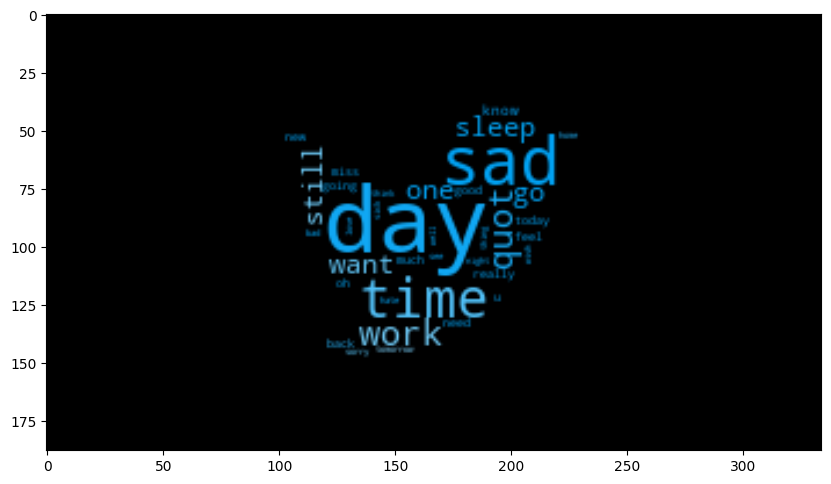

In [68]:
"""
Image-colored wordcloud with boundary map
=========================================
A slightly more elaborate version of an image-colored wordcloud
that also takes edges in the image into account.
Recreating an image similar to the parrot example.
"""

import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
# text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
img_color = np.array(Image.open(os.path.join(d, "./assets/twitter.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
img_color = img_color[::3, ::3]

# create mask  white is "masked out"
img_mask = img_color.copy()
img_mask[img_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(img_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
img_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=img_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(final)
# plt.imshow(wc)

# # create coloring from image
image_colors = ImageColorGenerator(img_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
# wc.to_file("twitter.png")

# plt.figure(figsize=(10, 10))
# plt.title("Original Image")
# plt.imshow(img_color)

# plt.figure(figsize=(10, 10))
# plt.title("Edge map")
# plt.imshow(edges)
# plt.show()

awww bummer david carr third day upset can't update facebook texting might cry result school today also blah dived many times ball managed save rest go bounds whole body feels itchy like fire behaving mad can't see whole crew need hug hey long time see yes rains bit bit lol fine thanks how's nope que muera spring break plain city snowing pierced ears bear watch thought ua loss embarrassing counts idk either never talk anymore would've first gun really though zac snyder's doucheclown wish watch miss premiere hollis ' death scene hurt severely watch film wry directors cut file taxes ahh ive always wanted see rent love soundtrack oh dear drinking forgotten table drinks day get much done one friend called asked meet mid valley today i've time sigh baked cake ated week going hoped blagh class tomorrow hate call wake people going cry sleep watching marley sad miss lilly ooooh lol leslie ok leslie get mad meh almost lover exception track gets depressed every time hacked account aim make new o

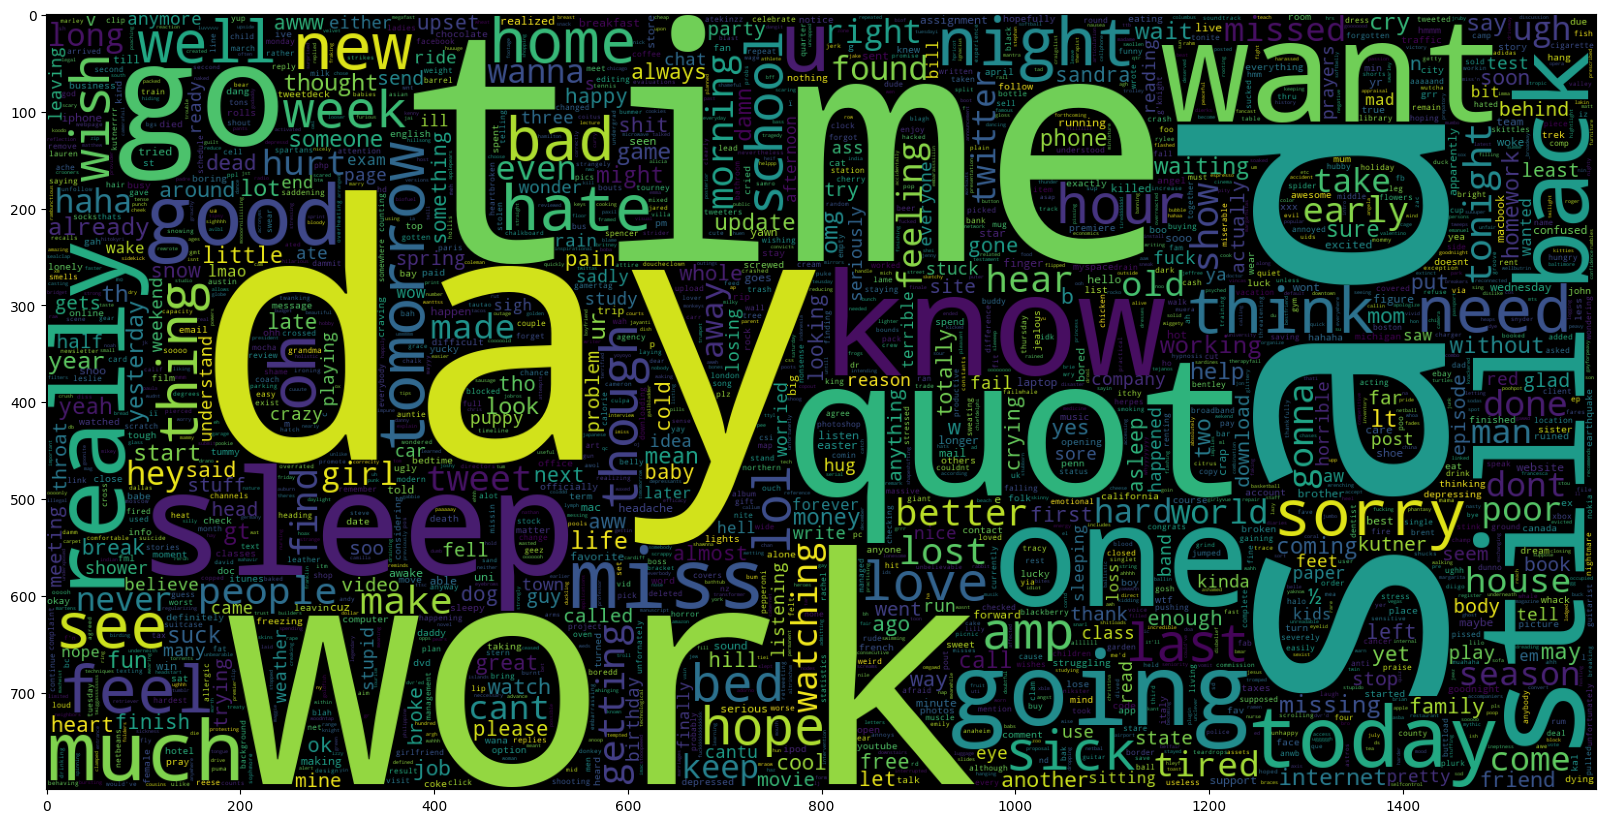

In [69]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800,
               collocations=False).generate(final)
plt.imshow(wc)

In [71]:
def identify_language(texts):
    """
    Args:
        texts: A list of texts.

    Returns:
        A dict of predicted languages.
    """
    c = 10000
    predicted_languages = {}

    for i in df['clean_tweets']:
        line = " ".join(i)
        language = langid.classify(line)
    
        if language[0] in predicted_languages.keys():
            predicted_languages[language[0]] += 1
        else:
            predicted_languages[language[0]] = 1
        c-=1
        if not c:
            break
    return predicted_languages


lan = identify_language(df['clean_tweets'])
print(lan)

{'cy': 1403, 'an': 6135, 'br': 187, 'it': 809, 'sq': 406, 'pt': 160, 'hr': 309, 'cs': 141, 'en': 127, 'es': 57, 'sl': 30, 'vo': 19, 'hu': 5, 'ga': 8, 'gl': 22, 'pl': 47, 'bs': 30, 'da': 36, 'ca': 20, 'mt': 11, 'af': 1, 'sk': 20, 'sv': 9, 'ky': 3, 'qu': 1, 'el': 2, 'nl': 1, 'de': 1}


In [ ]:
c = 10
predicted_languages = {}

for i in df['clean_tweets']:
    line = " ".join(i)
    language = langid.classify(line)

    if language[0] in predicted_languages.keys():
        predicted_languages[language[0]] += 1
    else:
        predicted_languages[language[0]] = 1
        
    
    c-=1
    if not c:
        break
print(predicted_languages)
        